In [1]:
from bs4 import BeautifulSoup as bs
import nltk

In [2]:
link = 'http://php.net/'

In [3]:
import requests
response = requests.get(link)

In [4]:
html = response.text

In [5]:
soup = bs(html,"lxml")

In [6]:
soup.title

<title>PHP: Hypertext Preprocessor</title>

In [7]:
soup.title.string

'PHP: Hypertext Preprocessor'

In [8]:
text= soup.get_text()

In [9]:
import re
tokens = re.findall('\w+',text)
tokens[:10]

['PHP',
 'Hypertext',
 'Preprocessor',
 'Downloads',
 'Documentation',
 'Get',
 'Involved',
 'Help',
 'Getting',
 'Started']

In [10]:
# Import RegexpTokenizer from nltk.tokenize
from nltk.tokenize import RegexpTokenizer # you can also create custom tokenizer

# Create tokenizer
tokenizer = RegexpTokenizer('\w+')



# Create tokens
tokens = tokenizer.tokenize(text)
tokens[:10]

['PHP',
 'Hypertext',
 'Preprocessor',
 'Downloads',
 'Documentation',
 'Get',
 'Involved',
 'Help',
 'Getting',
 'Started']

In [11]:
len(tokens)

3067

In [12]:
words = []
for word in tokens:
    words.append(word.lower())
    
words[:10]

['php',
 'hypertext',
 'preprocessor',
 'downloads',
 'documentation',
 'get',
 'involved',
 'help',
 'getting',
 'started']

In [13]:
import nltk
sw = nltk.corpus.stopwords.words('english')
sw[:5]

['i', 'me', 'my', 'myself', 'we']

In [14]:
words_ns = []
for word in words:
    if word not in sw:
        words_ns.append(word)
words_ns[:5]

['php', 'hypertext', 'preprocessor', 'downloads', 'documentation']

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(20,8)})

In [18]:
nlp_words = nltk.FreqDist(words_ns)
nlp_words

FreqDist({'php': 169, 'release': 80, '0': 69, '7': 58, '8': 45, 'found': 45, 'downloads': 44, 'source': 43, 'please': 40, 'version': 38, ...})

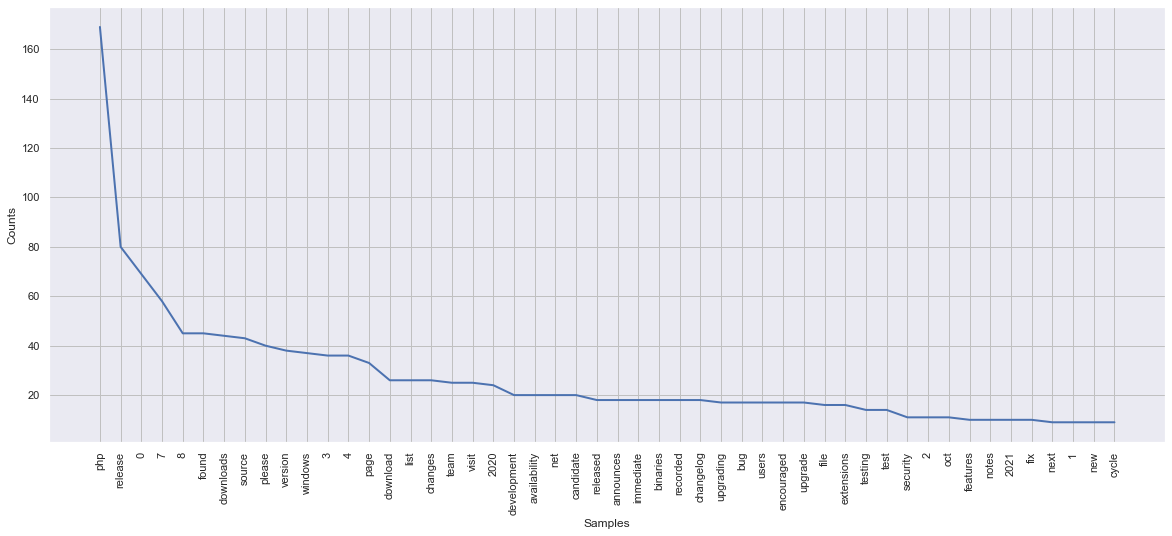

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
nlp_words.plot(50) # PHP word has appeared the most times.

In [19]:
def plot_word_freq(url):
    """Takes a url (from websites) and plots a word frequency
    distribution"""
    # Make the request and check object type
    r = requests.get(url)
    # Extract HTML from Response object and print
    html = r.text
    # Create a BeautifulSoup object from the HTML
    soup = bs(html, "lxml")
    # Get the text out of the soup and print it
    text = soup.get_text()
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    # Create freq dist and plot
    freqdist1 = nltk.FreqDist(words_ns)
    freqdist1.plot(25)

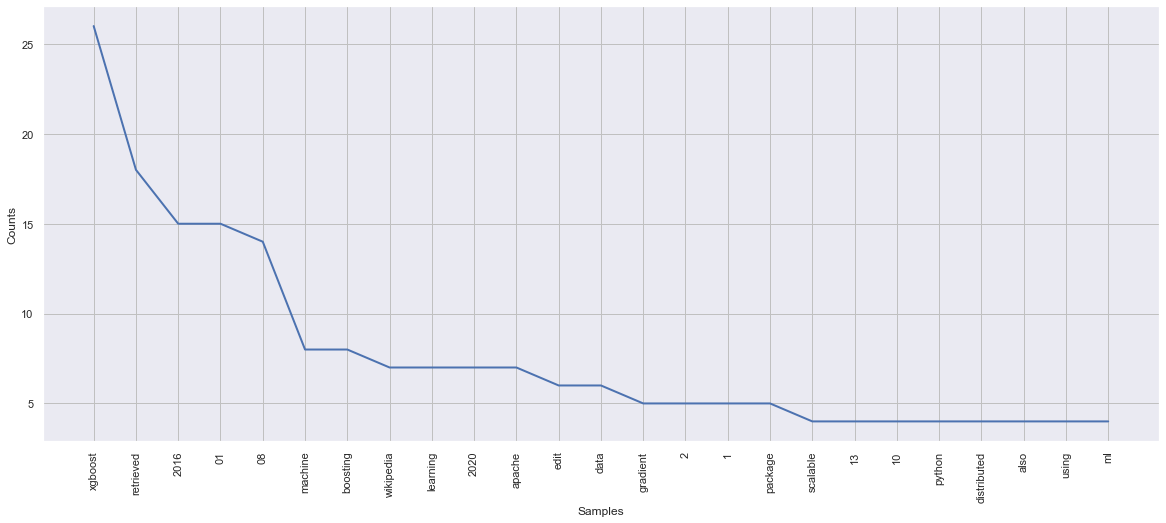

In [20]:
plot_word_freq('https://en.wikipedia.org/wiki/XGBoost')

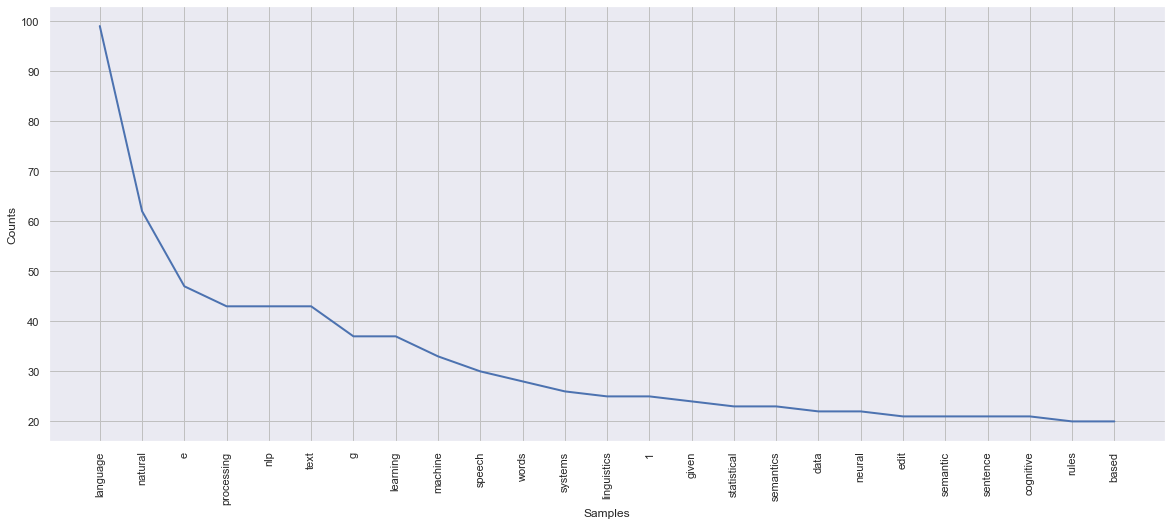

In [21]:
plot_word_freq('https://en.wikipedia.org/wiki/Natural_language_processing')